In [1]:
import numpy as np
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

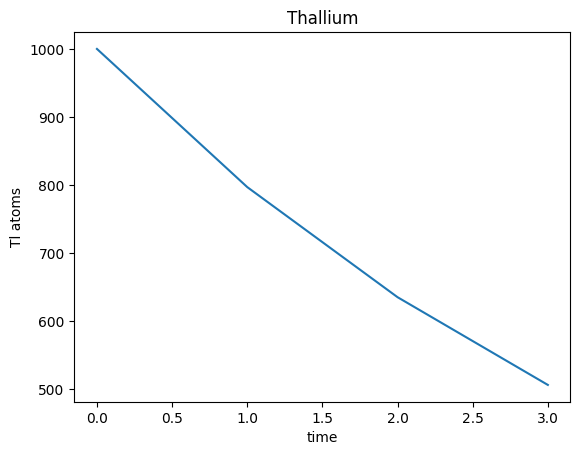

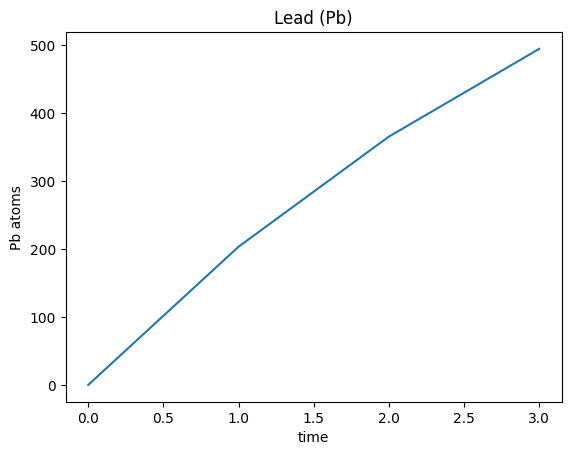

In [2]:

T = 3.052
Tha_atoms, Lead_atoms = 1000, 0
s_Tl, s_Pb = [], []
i, t = 0, 0

while(t < T):
    pt = 1-2**(-t/T)
    Tl = Tha_atoms*pt
    s_Tl.append(1000-Tl)
    s_Pb.append(Tl)
    t += 1
    i += 1

t = np.arange(0, i, 1)
fig, ax1 = plt.subplots()
ax1.set(xlabel='time', ylabel='Tl atoms', title='Thallium')
ax1.plot(t, s_Tl)
fig, ax2 = plt.subplots()
ax2.set(xlabel='time', ylabel='Pb atoms', title='Lead (Pb)')
ax2.plot(t, s_Pb)

plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

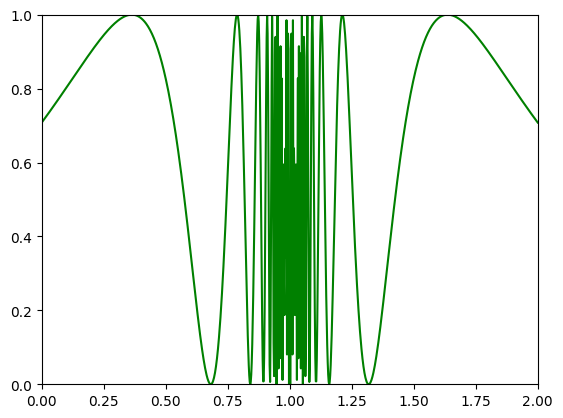

Hit/miss Mean integral: 1.3469280000000003
Hit/miss Std integral: 0.008339569293434759
The mean value method integral:  1.3442548565423709
Standard deviation:  0.03162277660168379


In [3]:
def f(x):
    return np.sin(1/(1-x))**2
x = np.linspace(0,2,1000)
plt.plot(x,f(x), c="g")
plt.axis([0, 2, 0, 1])
plt.show()

n= 10000
l=[]
for i in range(50):
    c = 0
    for i in range(n):
        x = 2 * np.random.random()
        y = np.random.random()
        if y < f(x): c =c+ 1
    l.append(2 * c / n)

print("Hit/miss Mean integral:", np.mean(l))
print("Hit/miss Std integral:", np.std(l))

x = np.linspace(0,2,1000)
mean_2 = (2/1000) * np.sum(f(x))
print("The mean value method integral: ", mean_2)
std = 1/np.sqrt(1000)
print("Standard deviation: ",std)

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [4]:
N=10000
dim = 2

def area_2d(N):
    count = 0
    for i in range(N):
        x = 2*np.random.random()-1
        y = 2*np.random.random()-1
        if np.power(x,2) + np.power(y,2) <= 1:
            count+=1
    return ((2**dim)/N)*count

print('Area of the circle is:',area_2d(N))

def area_xd(N,dim):
    count = 0
    for i in range(N):
        x = 2*np.random.random(dim,)-1
        if np.sum(np.power(x,2)) <= 1:
            count+=1
    return ((2**dim)/N)*count

print("The area for a 10D circle is: ", area_xd(N,10))

Area of the circle is: 3.1256
The area for a 10D circle is:  2.2528


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

0.9584234379600974


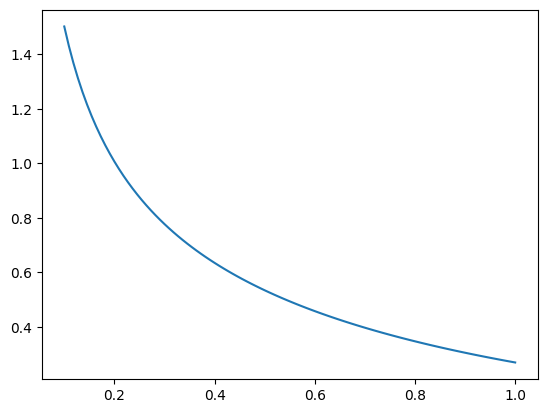

In [5]:
def f(t):
    return t**(-1/2)/(np.exp(t) + 1)

x=np.linspace(0.1, 1.0, 100)
plt.plot(x, f(x), '-')
def w(t):
    return 1/np.sqrt(t)

def w_dist(t):
    return t**2 / 4.0

n = 10000000
a = 0
b = 1

p = np.random.random(n)
x =  w_dist(p)

Iw = 2.0 * (np.sqrt(b) - np.sqrt(a))
If = Iw *  np.mean(f(x) / w(x))

print(If)